In [1]:
import torch, torchvision, PIL, numpy as np
import pathlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm.auto import tqdm
import pandas as pd
from google.colab import drive
import shutil
import os

Get images and data. Relevant files are found in the respository except the images, which are found here: https://drive.google.com/file/d/1-0yYrZAs-BoonZeXHhS5Cb5jWHzlNFvK/view?usp=sharing.

In [2]:
drive.mount('/content/drive')
with open(f'/content/drive/My Drive/CPEN 291 Datasets/Sports_Dataset/annotations_with_bbox.csv', 'r'):
  shutil.copy("/content/drive/My Drive/CPEN 291 Datasets/Sports_Dataset/annotations_with_bbox.csv", "annotations_with_bbox.csv")

dataset = pd.read_csv('annotations_with_bbox.csv')

with open('/content/drive/My Drive/CPEN 291 Datasets/Sports_Dataset/images.tar.gz', 'r'):
  shutil.copy('/content/drive/My Drive/CPEN 291 Datasets/Sports_Dataset/images.tar.gz', 'images.tar.gz')

drive.flush_and_unmount()

Mounted at /content/drive


In [3]:
!tar xfz images.tar.gz

In [4]:
dataset

,Unnamed: 0,id,x,y,w,h,label
0,0,015601864.jpg,653.204915,221.000000,7.795085,10.000000,1
1,1,015601864.jpg,584.734004,269.000000,62.531992,125.000000,1
2,2,015601864.jpg,638.038276,188.000000,22.961724,33.000000,2
3,3,015601864.jpg,549.408423,185.000000,66.591577,84.000000,2
4,4,015601864.jpg,573.000000,136.911589,119.000000,60.176823,3
...,...,...,...,...,...,...,...
127530,127530,025398745.jpg,879.486367,259.000000,63.513633,104.000000,2
127531,127531,025398745.jpg,868.288729,118.000000,102.711271,141.000000,3
127532,127532,025398745.jpg,871.000000,165.000000,46.000000,63.000000,4
127533,127533,025398745.jpg,894.986986,118.000000,24.026028,47.000000,5


In [5]:
dataset.drop(labels="Unnamed: 0", axis='columns')

,id,x,y,w,h,label
0,015601864.jpg,653.204915,221.000000,7.795085,10.000000,1
1,015601864.jpg,584.734004,269.000000,62.531992,125.000000,1
2,015601864.jpg,638.038276,188.000000,22.961724,33.000000,2
3,015601864.jpg,549.408423,185.000000,66.591577,84.000000,2
4,015601864.jpg,573.000000,136.911589,119.000000,60.176823,3
...,...,...,...,...,...,...
127530,025398745.jpg,879.486367,259.000000,63.513633,104.000000,2
127531,025398745.jpg,868.288729,118.000000,102.711271,141.000000,3
127532,025398745.jpg,871.000000,165.000000,46.000000,63.000000,4
127533,025398745.jpg,894.986986,118.000000,24.026028,47.000000,5


Found some unexpected data anomalies when training so they need to be removed.

In [6]:
w_0 = dataset[dataset['w'] == 0]
w_0

,Unnamed: 0,id,x,y,w,h,label
65625,65625,016983943.jpg,743.0,72.0,0.0,0.0,6
77340,77340,068839670.jpg,1782.0,660.0,0.0,0.0,6
105330,105330,007261085.jpg,756.0,260.0,0.0,0.0,6


In [7]:
h_0 = dataset[dataset['h'] == 0]
h_0

,Unnamed: 0,id,x,y,w,h,label
65625,65625,016983943.jpg,743.0,72.0,0.0,0.0,6
77340,77340,068839670.jpg,1782.0,660.0,0.0,0.0,6
105330,105330,007261085.jpg,756.0,260.0,0.0,0.0,6


In [8]:
dataset.drop([65625, 77340, 105330], inplace=True)

Second dataset, images here: https://drive.google.com/file/d/1-4z-UM1Hci1gLPp00Uh3_YIjMG8u12vt/view?usp=sharing

In [9]:
drive.mount('/content/drive')
with open('/content/drive/My Drive/CPEN 291 Datasets/Tracking_Dataset/2nd_dataset.csv', 'r'):
  shutil.copy("/content/drive/My Drive/CPEN 291 Datasets/Tracking_Dataset/2nd_dataset.csv", "2nd_dataset.csv")

dataset2 = pd.read_csv('2nd_dataset.csv')

with open('/content/drive/My Drive/CPEN 291 Datasets/Tracking_Dataset/dataset2.tar.gz', 'r'):
  shutil.copy('/content/drive/My Drive/CPEN 291 Datasets/Tracking_Dataset/dataset2.tar.gz', 'dataset2.tar.gz')

drive.flush_and_unmount()

Mounted at /content/drive


In [10]:
!tar xfz dataset2.tar.gz

In [11]:
!mv dataset images_2

In [12]:
print(len(os.listdir('images_2')))
print(len(dataset2))
print(len(dataset2["image"].unique()))

7490
7490
7490


In [13]:
dataset2.columns = ['Unnamed: 0', 'id', 'x', 'y', 'w', 'h', 'label']
dataset2

,Unnamed: 0,id,x,y,w,h,label
0,0,ball0040.jpg,200.34,113.73,45.13,45.59,7
1,1,ball0037.jpg,202.39,113.73,44.68,45.59,7
2,2,ball0254.jpg,203.30,113.73,44.68,45.13,7
3,3,ball0300.jpg,203.30,114.19,44.68,44.90,7
4,4,ball0021.jpg,201.94,114.19,45.35,45.58,7
...,...,...,...,...,...,...,...
7485,7570,dog-toy2292.jpg,225.00,145.00,34.00,56.00,16
7486,7571,dog-toy2293.jpg,223.00,151.00,34.00,56.00,16
7487,7572,dog-toy2294.jpg,221.00,157.00,34.00,57.00,16
7488,7573,dog-toy2295.jpg,219.00,164.00,34.00,57.00,16


In [14]:
dataset2.drop(labels="Unnamed: 0", axis='columns')

,id,x,y,w,h,label
0,ball0040.jpg,200.34,113.73,45.13,45.59,7
1,ball0037.jpg,202.39,113.73,44.68,45.59,7
2,ball0254.jpg,203.30,113.73,44.68,45.13,7
3,ball0300.jpg,203.30,114.19,44.68,44.90,7
4,ball0021.jpg,201.94,114.19,45.35,45.58,7
...,...,...,...,...,...,...
7485,dog-toy2292.jpg,225.00,145.00,34.00,56.00,16
7486,dog-toy2293.jpg,223.00,151.00,34.00,56.00,16
7487,dog-toy2294.jpg,221.00,157.00,34.00,57.00,16
7488,dog-toy2295.jpg,219.00,164.00,34.00,57.00,16


Get some Pytorch reference code to make things easier.

In [15]:
%%shell

git clone https://github.com/pytorch/vision.git
cd vision
git checkout v0.3.0

cp references/detection/utils.py ../
# cp references/detection/transforms.py ../
# cp references/detection/coco_eval.py ../
# cp references/detection/engine.py ../
# cp references/detection/coco_utils.py ../

Cloning into 'vision'...
remote: Enumerating objects: 23411, done.
remote: Counting objects: 100% (872/872), done.
remote: Compressing objects: 100% (273/273), done.
remote: Total 23411 (delta 623), reused 793 (delta 583), pack-reused 22539
Receiving objects: 100% (23411/23411), 29.81 MiB | 6.66 MiB/s, done.
Resolving deltas: 100% (17312/17312), done.
Note: checking out 'v0.3.0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at be376084 version check against PyTorch's CUDA version


In [16]:
import utils

Create the dataset class.

In [17]:
class DetectionDataset(torch.utils.data.Dataset):
  def __init__(self, df, image_dir, transform=None):
    super().__init__()

    self.df = df
    self.image_ids = self.df['id'].unique()
    self.image_dir = pathlib.Path(image_dir).resolve()
    self.transform = transform

  
  def __getitem__(self, idx):
    image_id = self.image_ids[idx]
    records = self.df[self.df['id'] == image_id]
    im = PIL.Image.open(self.image_dir/image_id).convert('RGB')
    im_width_orig, im_height_orig = im.size
    # im = torchvision.transforms.ToTensor()(im)
    if self.transform is not None:
      im = self.transform(im)

    if isinstance(im, torch.Tensor):
      im_height_new = im.size()[1]
      im_width_new = im.size()[2]
    else:
      im_width_new, im_height_new = im.size
    # ratios for resizing the image bounding box coordinates
    rx = im_width_new / im_width_orig
    ry = im_height_new / im_height_orig
    # bounding box coordinates are stored with width and height while we want an endpoint
    boxes = records[['x', 'y', 'w', 'h']].values
    boxes[:, 0] *= rx
    boxes[:, 1] *= ry
    boxes[:, 2] *= rx
    boxes[:, 3] *= ry
    boxes[:, 2] = boxes[:, 0] + boxes[:, 2]
    boxes[:, 3] = boxes[:, 1] + boxes[:, 3]
    boxes = torch.as_tensor(boxes, dtype=torch.float32)
    area = (boxes[:,3] - boxes[:,1]) * (boxes[:,2] - boxes[:,0])
    labels = torch.tensor(records['label'].values)
        
    target = {}
    target["boxes"] = boxes
    target["labels"] = labels
    target["image_id"] = torch.tensor([idx])
    target["area"] = area
    target["iscrowd"] = torch.zeros(len(labels), dtype=torch.int64) #Assume all are not crowded

    return im, target

  def __len__(self):
    return self.image_ids.shape[0]

In [18]:
dataset_full = DetectionDataset(dataset, 'images_data', torchvision.transforms.ToTensor())

In [19]:
dataset_full[0]

(tensor([[[0.0078, 0.0078, 0.0039,  ..., 0.0078, 0.0078, 0.0078],
          [0.0118, 0.0118, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
          [0.0431, 0.0510, 0.0510,  ..., 0.0275, 0.0314, 0.0392],
          ...,
          [0.5843, 0.5882, 0.5882,  ..., 0.0078, 0.0078, 0.0078],
          [0.0078, 0.0039, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0314, 0.0314, 0.0235,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0039, 0.0039, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
          [0.0118, 0.0118, 0.0118,  ..., 0.0039, 0.0039, 0.0039],
          [0.0706, 0.0706, 0.0667,  ..., 0.0314, 0.0353, 0.0314],
          ...,
          [0.5804, 0.5843, 0.5843,  ..., 0.0196, 0.0196, 0.0196],
          [0.0039, 0.0000, 0.0000,  ..., 0.0078, 0.0078, 0.0078],
          [0.0275, 0.0275, 0.0196,  ..., 0.0078, 0.0078, 0.0078]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0039, 0.0118, 0.0196,  ..., 0.0353, 0.0353, 0.0353],
          [0.0941, 0.0941, 0.1098,  ...,

In [20]:
print(dataset.loc[0])

Unnamed: 0                0
id            015601864.jpg
x                   653.205
y                       221
w                   7.79508
h                        10
label                     1
Name: 0, dtype: object


Now to check how it looks as a picture instead of just numbers.

In [21]:
classes = {
    1: 'shin',
    2: 'thigh',
    3: 'torso',
    4: 'forearm',
    5: 'uparm',
    6: 'head',
    7: 'ball',
    8: 'cup',
    9: 'juice',
    10: 'rubikscube',
    11: 'hand',
    12: 'bird',
    13: 'motorcycle',
    14: 'bike',
    15: 'car',
    16: 'toy-dog'
}

In [57]:
def show_img(img, title=None):
  if torch.is_tensor(img):
    img = img.cpu().permute(1,2,0)
  plt.imshow(img)
  if title:
    plt.title(title, color='w')
  plt.axis('off')

def show_boxes(img, sample, classes=None, confidence=0.7):
  show_img(img)
  ax = plt.gca()
  boxes = sample['boxes']
  labels = sample['labels']
  xmin, xmax = ax.get_xlim()
  ymax, ymin = ax.get_ylim()
  isx, isy = xmax-xmin, ymax-ymin
  for i in range(boxes.shape[0]):
    if 'scores' in sample:
      if sample['scores'][i] < confidence:
        continue
    box = boxes[i]
    label = labels[i]
    # x = max(xmin, box[0])
    # y = max(ymin, box[1])
    # w = min(box[2] - x, xmax - x)
    # h = min(box[3] - y, ymax - y)
    # x = xmin + isx * box[0]
    # y = ymin + isy * box[1]
    # w = isx * (box[2] - box[0])
    # h = isy * (box[3] - box[1])
    x = box[0]
    y = box[1]
    w = box[2] - x
    h = box[3] - y
    bbox = patches.Rectangle((x, y), w, h, ec='r', fc='none')
    ax.add_patch(bbox)
    if classes:
      plt.text(x, y, classes[label.item()], backgroundcolor='r', c='w')
  plt.show()  


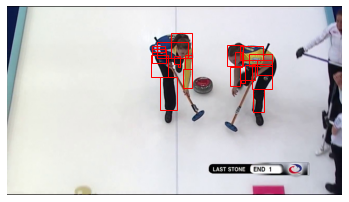

In [23]:
im, result = dataset_full[0]

show_boxes(im, result) #plotting with labels makes it impossible to see


Test transforms.

In [24]:
xform = torchvision.transforms.Compose([torchvision.transforms.Resize((240,426)), torchvision.transforms.ToTensor()])
dataset_full = DetectionDataset(dataset, 'images_data', xform)
dataset_full[0]

(tensor([[[0.0275, 0.0235, 0.0196,  ..., 0.0196, 0.0235, 0.0196],
          [0.0549, 0.0549, 0.0549,  ..., 0.0549, 0.0549, 0.0549],
          [0.0549, 0.0549, 0.0549,  ..., 0.0627, 0.0627, 0.0627],
          ...,
          [0.9294, 0.9333, 0.9333,  ..., 0.0588, 0.0588, 0.0588],
          [0.8980, 0.9059, 0.9020,  ..., 0.0431, 0.0431, 0.0431],
          [0.2784, 0.2784, 0.2824,  ..., 0.0078, 0.0078, 0.0078]],
 
         [[0.0392, 0.0353, 0.0314,  ..., 0.0196, 0.0235, 0.0235],
          [0.1059, 0.1020, 0.0980,  ..., 0.0824, 0.0824, 0.0824],
          [0.1020, 0.0980, 0.0902,  ..., 0.1059, 0.1059, 0.1059],
          ...,
          [0.9255, 0.9294, 0.9294,  ..., 0.0706, 0.0706, 0.0706],
          [0.8941, 0.9020, 0.8980,  ..., 0.0549, 0.0549, 0.0549],
          [0.2745, 0.2745, 0.2824,  ..., 0.0157, 0.0157, 0.0157]],
 
         [[0.0549, 0.0824, 0.1059,  ..., 0.0745, 0.0745, 0.0706],
          [0.2000, 0.2353, 0.2510,  ..., 0.2510, 0.2510, 0.2510],
          [0.2078, 0.2392, 0.2667,  ...,

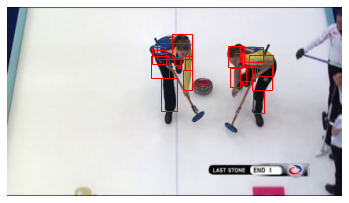

In [25]:
im, result = dataset_full[0]

show_boxes(im, result)

In [26]:
im.size()

torch.Size([3, 240, 426])

That looks good.

In [27]:
# !mkdir images_full

In [28]:
# for fn in os.listdir('images_data'):
#   shutil.copy(f'images_data/{fn}', f'images_full/{fn}')
# for fn in os.listdir('images_2'):
#   shutil.copy(f'images_2/{fn}', f'images_full/{fn}')

In [29]:
# print(len(os.listdir('images_full')))
# print(len(dataset_comb['id'].unique()))

Now to make the actual model.

In [30]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
def get_FRCNN_model(num_classes):
  model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

  in_features = model.roi_heads.box_predictor.cls_score.in_features

  model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

  return model

We also want to properly distribute the dataset, and need to make sure that even though the two datasets are imbalanced that they work together properly.

In [31]:
dataset1 = DetectionDataset(dataset, 'images_data', torchvision.transforms.ToTensor())
dataset2 = DetectionDataset(dataset2, 'images_2', torchvision.transforms.ToTensor())

In [32]:
n_all = len(dataset1)
n_used = int(1 * n_all)
n_train = int(0.8 * n_used)
n_test = n_used - n_train
rng = torch.Generator().manual_seed(291)
dataset1_tr, dataset1_tst, _ = torch.utils.data.random_split(dataset1, [n_train, n_test, n_all-n_train-n_test], rng)

In [33]:
n_all = len(dataset2)
n_used = int(1 * n_all)
n_train = int(0.8 * n_used)
n_test = n_used - n_train
rng = torch.Generator().manual_seed(291)
dataset2_tr, dataset2_tst, _ = torch.utils.data.random_split(dataset2, [n_train, n_test, n_all-n_train-n_test], rng)

In [34]:
dataset_train = torch.utils.data.ConcatDataset((dataset1_tr, dataset2_tr))
dataset_test = torch.utils.data.ConcatDataset((dataset1_tst, dataset2_tst))

In [35]:
# dataset_comb = dataset.append(dataset2, ignore_index=True)


In [36]:
# dataset_comb

In [37]:
# dataset_comb.drop(labels="Unnamed: 0", axis='columns')

In [38]:
# dataset_full = DetectionDataset(dataset_comb, 'images_full', xform)

In [39]:
model = get_FRCNN_model(len(classes)+1) #+1 because of background being class 0

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


Clear GPU memory to avoid problems.

In [40]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [41]:
device = torch.device('cuda:0')
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [42]:
#Note, dataset 1 is much larger than 2 so the split is likely very imbalanced. Look into later.
# dataset_train, dataset_test, _ = torch.utils.data.random_split(dataset_full, [n_train, n_test, n_all-n_train-n_test], rng)

Need a collate function for loaders.

In [43]:
def collate_fn(batch):
  return tuple(zip(*batch))

In [44]:
# Higher batch sizes can cause CUDA to run out of memory
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=8, shuffle=True, collate_fn=collate_fn)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=8, shuffle=False, collate_fn=collate_fn)

In [45]:
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

Finally, training.

In [46]:
def train(model, optimizer, scheduler, data_loader, device, print_freq, epoch=-1):
  model.train()
  metric_logger = utils.MetricLogger(delimiter=" ")
  metric_logger.add_meter('lr', utils.SmoothedValue(window_size=1, fmt='{value:.6f}'))
  if epoch != -1:
    header = f"Epoch: {epoch}"
  else:
    header = " "

  for images, targets in metric_logger.log_every(data_loader, print_freq, header):
    images = list(image.to(device) for image in images)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
    
    loss_dict = model(images, targets)
    losses = sum(loss for loss in loss_dict.values())

    optimizer.zero_grad()
    losses.backward()
    optimizer.step()
    
    #Average the results for display
    loss_dict = utils.reduce_dict(loss_dict)
    losses = sum(loss for loss in loss_dict.values())
    
    metric_logger.update(loss=losses, **loss_dict)
    metric_logger.update(lr=optimizer.param_groups[0]["lr"])

  scheduler.step() 
  return metric_logger


In [47]:
from google.colab import files

In [48]:
num_epochs = 6

for epoch in range(num_epochs):
  train(model, optimizer, scheduler, loader_train, device, print_freq=200, epoch=epoch)
  torch.save(model.state_dict(), f"model{epoch}.pt")
  files.download(f"model{epoch}.pt")


Epoch: 0 [   0/1655] eta: 1:15:24 lr: 0.005000 loss: 4.0216 (4.0216) loss_classifier: 3.1301 (3.1301) loss_box_reg: 0.1334 (0.1334) loss_objectness: 0.7017 (0.7017) loss_rpn_box_reg: 0.0565 (0.0565) time: 2.7338 data: 0.1955 max mem: 9571
Epoch: 0 [ 200/1655] eta: 1:05:27 lr: 0.005000 loss: 0.8375 (0.9540) loss_classifier: 0.3518 (0.4444) loss_box_reg: 0.3967 (0.3747) loss_objectness: 0.0475 (0.0859) loss_rpn_box_reg: 0.0429 (0.0490) time: 2.7664 data: 0.2387 max mem: 9934
Epoch: 0 [ 400/1655] eta: 0:56:49 lr: 0.005000 loss: 0.8002 (0.8764) loss_classifier: 0.3293 (0.3863) loss_box_reg: 0.3634 (0.3746) loss_objectness: 0.0440 (0.0691) loss_rpn_box_reg: 0.0290 (0.0465) time: 2.7089 data: 0.1970 max mem: 9936
Epoch: 0 [ 600/1655] eta: 0:47:42 lr: 0.005000 loss: 0.6877 (0.8218) loss_classifier: 0.2884 (0.3531) loss_box_reg: 0.3095 (0.3624) loss_objectness: 0.0364 (0.0611) loss_rpn_box_reg: 0.0337 (0.0452) time: 2.7187 data: 0.1989 max mem: 9936
Epoch: 0 [ 800/1655] eta: 0:38:37 lr: 0.0050

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch: 1 [   0/1655] eta: 1:17:12 lr: 0.005000 loss: 0.6716 (0.6716) loss_classifier: 0.2559 (0.2559) loss_box_reg: 0.3501 (0.3501) loss_objectness: 0.0344 (0.0344) loss_rpn_box_reg: 0.0311 (0.0311) time: 2.7990 data: 0.2653 max mem: 9936
Epoch: 1 [ 200/1655] eta: 1:06:16 lr: 0.005000 loss: 0.6286 (0.6088) loss_classifier: 0.2469 (0.2303) loss_box_reg: 0.3119 (0.3138) loss_objectness: 0.0247 (0.0286) loss_rpn_box_reg: 0.0190 (0.0361) time: 2.7462 data: 0.2174 max mem: 9936
Epoch: 1 [ 400/1655] eta: 0:57:07 lr: 0.005000 loss: 0.6408 (0.6160) loss_classifier: 0.2425 (0.2335) loss_box_reg: 0.3182 (0.3176) loss_objectness: 0.0222 (0.0292) loss_rpn_box_reg: 0.0245 (0.0357) time: 2.7459 data: 0.2165 max mem: 9936
Epoch: 1 [ 600/1655] eta: 0:48:03 lr: 0.005000 loss: 0.6165 (0.6181) loss_classifier: 0.2370 (0.2335) loss_box_reg: 0.3211 (0.3196) loss_objectness: 0.0251 (0.0293) loss_rpn_box_reg: 0.0309 (0.0357) time: 2.7378 data: 0.2144 max mem: 9936
Epoch: 1 [ 800/1655] eta: 0:38:52 lr: 0.0050

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch: 2 [   0/1655] eta: 1:15:14 lr: 0.005000 loss: 0.7073 (0.7073) loss_classifier: 0.2649 (0.2649) loss_box_reg: 0.4055 (0.4055) loss_objectness: 0.0151 (0.0151) loss_rpn_box_reg: 0.0217 (0.0217) time: 2.7279 data: 0.2228 max mem: 9936
Epoch: 2 [ 200/1655] eta: 1:05:40 lr: 0.005000 loss: 0.5373 (0.5692) loss_classifier: 0.1878 (0.2119) loss_box_reg: 0.3012 (0.3017) loss_objectness: 0.0197 (0.0234) loss_rpn_box_reg: 0.0246 (0.0322) time: 2.7225 data: 0.2000 max mem: 9936
Epoch: 2 [ 400/1655] eta: 0:56:40 lr: 0.005000 loss: 0.5434 (0.5756) loss_classifier: 0.2116 (0.2127) loss_box_reg: 0.2941 (0.3063) loss_objectness: 0.0209 (0.0237) loss_rpn_box_reg: 0.0193 (0.0328) time: 2.7180 data: 0.2050 max mem: 9936
Epoch: 2 [ 600/1655] eta: 0:47:40 lr: 0.005000 loss: 0.6161 (0.5843) loss_classifier: 0.2088 (0.2167) loss_box_reg: 0.3268 (0.3096) loss_objectness: 0.0235 (0.0241) loss_rpn_box_reg: 0.0302 (0.0340) time: 2.7093 data: 0.1903 max mem: 9936
Epoch: 2 [ 800/1655] eta: 0:38:37 lr: 0.0050

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch: 3 [   0/1655] eta: 1:14:04 lr: 0.000500 loss: 0.4774 (0.4774) loss_classifier: 0.1798 (0.1798) loss_box_reg: 0.2606 (0.2606) loss_objectness: 0.0217 (0.0217) loss_rpn_box_reg: 0.0153 (0.0153) time: 2.6855 data: 0.1641 max mem: 9936
Epoch: 3 [ 200/1655] eta: 1:06:20 lr: 0.000500 loss: 0.5909 (0.5343) loss_classifier: 0.2020 (0.1946) loss_box_reg: 0.3336 (0.2893) loss_objectness: 0.0165 (0.0196) loss_rpn_box_reg: 0.0207 (0.0307) time: 2.7655 data: 0.2362 max mem: 9936
Epoch: 3 [ 400/1655] eta: 0:57:08 lr: 0.000500 loss: 0.5044 (0.5268) loss_classifier: 0.1727 (0.1909) loss_box_reg: 0.2584 (0.2861) loss_objectness: 0.0140 (0.0193) loss_rpn_box_reg: 0.0277 (0.0305) time: 2.7432 data: 0.2121 max mem: 9936
Epoch: 3 [ 600/1655] eta: 0:48:00 lr: 0.000500 loss: 0.5798 (0.5227) loss_classifier: 0.2002 (0.1887) loss_box_reg: 0.3032 (0.2846) loss_objectness: 0.0179 (0.0188) loss_rpn_box_reg: 0.0251 (0.0306) time: 2.7250 data: 0.2106 max mem: 9936
Epoch: 3 [ 800/1655] eta: 0:38:56 lr: 0.0005

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch: 4 [   0/1655] eta: 1:12:21 lr: 0.000500 loss: 0.4640 (0.4640) loss_classifier: 0.1651 (0.1651) loss_box_reg: 0.2732 (0.2732) loss_objectness: 0.0127 (0.0127) loss_rpn_box_reg: 0.0128 (0.0128) time: 2.6230 data: 0.1215 max mem: 9936
Epoch: 4 [ 200/1655] eta: 1:06:07 lr: 0.000500 loss: 0.4845 (0.5131) loss_classifier: 0.1686 (0.1839) loss_box_reg: 0.2877 (0.2847) loss_objectness: 0.0144 (0.0169) loss_rpn_box_reg: 0.0223 (0.0276) time: 2.7434 data: 0.2025 max mem: 9936
Epoch: 4 [ 400/1655] eta: 0:56:57 lr: 0.000500 loss: 0.5060 (0.5102) loss_classifier: 0.1847 (0.1831) loss_box_reg: 0.2707 (0.2821) loss_objectness: 0.0126 (0.0171) loss_rpn_box_reg: 0.0168 (0.0278) time: 2.7120 data: 0.1934 max mem: 9936
Epoch: 4 [ 600/1655] eta: 0:47:50 lr: 0.000500 loss: 0.4939 (0.5125) loss_classifier: 0.1838 (0.1829) loss_box_reg: 0.2683 (0.2824) loss_objectness: 0.0145 (0.0174) loss_rpn_box_reg: 0.0317 (0.0299) time: 2.6941 data: 0.1822 max mem: 9936
Epoch: 4 [ 800/1655] eta: 0:38:42 lr: 0.0005

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch: 5 [   0/1655] eta: 1:16:11 lr: 0.000500 loss: 0.5925 (0.5925) loss_classifier: 0.2152 (0.2152) loss_box_reg: 0.2983 (0.2983) loss_objectness: 0.0490 (0.0490) loss_rpn_box_reg: 0.0300 (0.0300) time: 2.7621 data: 0.2063 max mem: 9936
Epoch: 5 [ 200/1655] eta: 1:06:05 lr: 0.000500 loss: 0.4333 (0.4899) loss_classifier: 0.1563 (0.1728) loss_box_reg: 0.2664 (0.2707) loss_objectness: 0.0157 (0.0164) loss_rpn_box_reg: 0.0181 (0.0299) time: 2.7378 data: 0.2002 max mem: 9936
Epoch: 5 [ 400/1655] eta: 0:57:01 lr: 0.000500 loss: 0.5064 (0.5020) loss_classifier: 0.1737 (0.1769) loss_box_reg: 0.2658 (0.2767) loss_objectness: 0.0150 (0.0170) loss_rpn_box_reg: 0.0279 (0.0313) time: 2.7281 data: 0.2049 max mem: 9936
Epoch: 5 [ 600/1655] eta: 0:47:50 lr: 0.000500 loss: 0.4838 (0.4987) loss_classifier: 0.1674 (0.1759) loss_box_reg: 0.2419 (0.2754) loss_objectness: 0.0119 (0.0167) loss_rpn_box_reg: 0.0217 (0.0307) time: 2.7009 data: 0.1755 max mem: 9936
Epoch: 5 [ 800/1655] eta: 0:38:44 lr: 0.0005

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
drive.mount('/content/drive')
with open('/content/drive/My Drive/CPEN 291 Datasets/Model.pt', 'r'):
  shutil.copy('/content/drive/My Drive/CPEN 291 Datasets/Model.pt', 'Model.pt')
drive.flush_and_unmount()

Mounted at /content/drive


Loading the model.

In [ ]:
model = get_FRCNN_model(len(classes)+1)
model.load_state_dict(torch.load('Model.pt'))
model.eval()

In [ ]:
im = dataset_test[0][0]
model.cuda()
model.eval()
with torch.no_grad():
  pred = model([im.to(device)])
pred

[{'boxes': tensor([[193.0165,  38.0973, 233.8259,  89.9706],
          [240.2178, 135.0726, 292.2546, 181.5878],
          [298.2349, 147.9878, 338.8302, 224.2254],
          [198.4846,  32.3433, 215.7333,  49.8049],
          [229.6833,  48.6701, 317.3680, 100.8429],
          [294.2305,  94.6910, 332.1612, 142.8115],
          [330.1117, 141.6701, 348.0049, 165.2628],
          [249.3353,  69.2851, 299.4808, 110.9135],
          [221.7203, 177.1740, 255.2713, 237.0218],
          [262.0779,  50.1960, 329.2240,  88.8448],
          [238.1390,  74.1650, 290.0622, 129.6729],
          [228.7350,  63.0520, 315.4572, 128.6034],
          [241.8707, 112.7910, 304.5345, 187.5599],
          [245.4510,  63.4537, 299.7183, 107.4604],
          [311.6262,  93.6539, 341.5027, 142.8945],
          [292.6363, 100.7774, 335.1618, 144.4642],
          [322.7256, 135.3119, 348.3587, 168.9302],
          [287.3450,  95.3375, 330.7379, 142.2590],
          [214.8004,  66.7085, 288.9407, 151.2309],
   

In [50]:
model.eval()
model.cuda()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

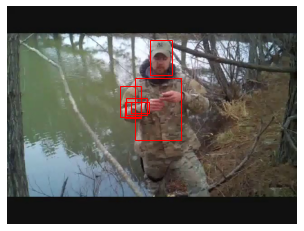

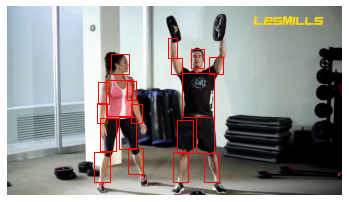

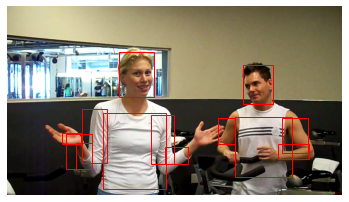

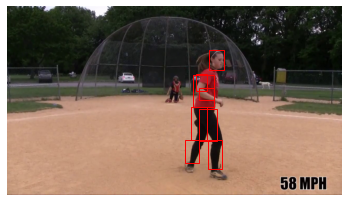

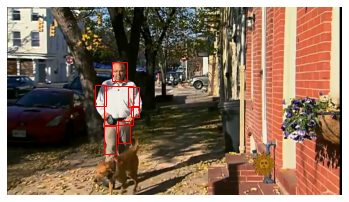

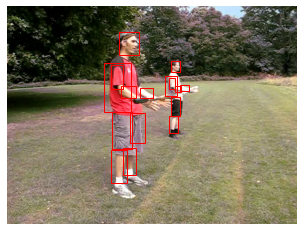

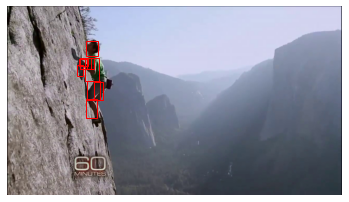

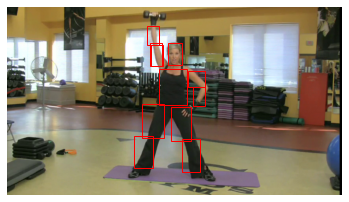

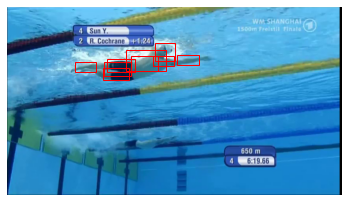

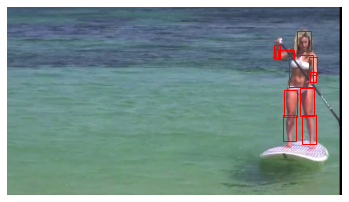

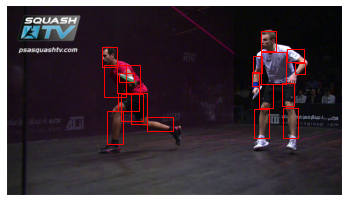

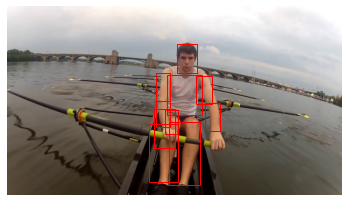

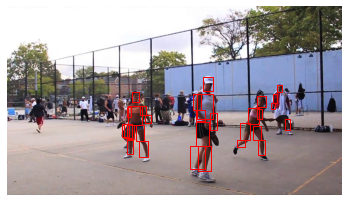

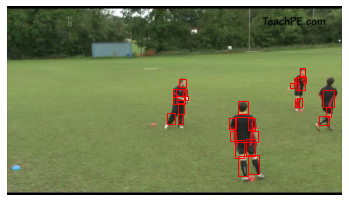

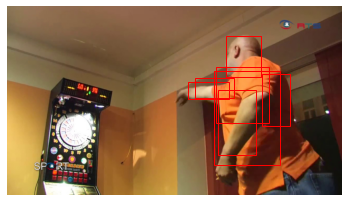

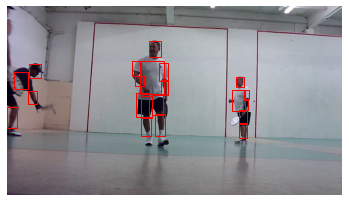

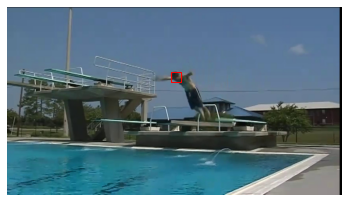

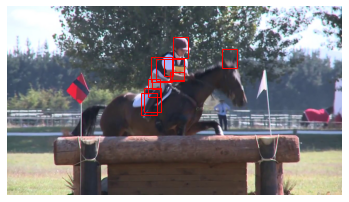

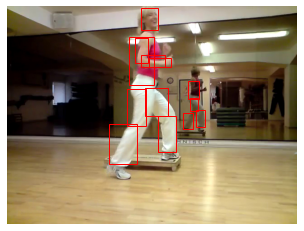

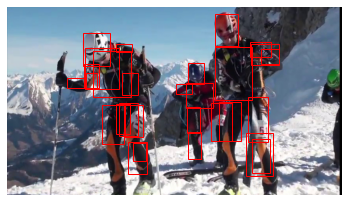

In [62]:
for i in range(20):
  im = dataset_test[i][0]
  with torch.no_grad():
    pred = model([im.to(device)])
    show_boxes(im, pred[0], confidence=0.5)

Viewing the results. Pretty good so long as lower scoring predictions are suppressed. With a lower confidence, more, smaller boxes are appear. When running this model, non maximum suppression is also used, which should mostly solve the problems with smaller bounding boxes being contained entirely within larger ones, while also allowing less confident yet still important bounding boxes.